# 1. 신경망 복습

## 수학과 파이썬 복습

신경망 계산에 필요한 벡터와 행렬 등에 관한 것을 복습해보자. 신경망을 원활하게 구현하기 위한 파이썬 코드, 특히 넘파이를 사용한 코드를 되새겨 볼 것이다.

### 벡터와 행렬

신경망에서는 벡터와 행렬(또는 텐서)가 등장한다.

'벡터'는 벡터는 **크기와 방향을 가진 양** 이다. 벡터는 숫자가 일렬로 늘어선 집합으로 표현할 수 있으며, 파이썬에서는 1차원 배열로 취급할 수 있다.

행렬은 **숫자가 2차원 형태로 늘어선 것** 이다.

벡터는 1차원 배열로, 행렬은 2차원 배열로 표현할 수 있다. 또 행렬에서 **가로줄을 행, 세로줄을 열** 이라고 한다. 벡터와 행렬을 **확장하여 숫자 집합을 N차원으로 표현한 것**도 생각할 수 있는데, 이를 일반적으로 **텐서** 라고 한다.

수학과 딥러닝 등 많은 분야에서 **열벡터 방식을 선호**하지만, 구현 편의를 고려해 여기에서는 **'행벡터'로 다룰 것**이다.

파이썬으로 구현할 때, 벡터를 행벡터로 취급할 경우, 벡터를 **가로 방향 행렬로 변환**해 사용하면 명확해진다. 원소 수가 N개인 벡터라면 1 x N 형상의 행렬로 처리한다.

그렇다면 벡터와 행렬을 생성해보자.

In [1]:
import numpy as np

x = np.array([1,2,3])
x.__class__ # 클래스의 이름을 표시한다.

numpy.ndarray

In [2]:
x.shape # 형상 표시

(3,)

In [3]:
x.ndim # 차원 표시

1

In [4]:
W = np.array([[1,2,3], [4,5,6]])
W.shape # 한 덩어리로 묶여있는 것을 행이라고 보면 된다.

(2, 3)

In [5]:
W.ndim

2

벡터와 행렬은 np.array() 메서드로 생성할 수 있다. 이 메서드는 넘파이의 다차원 배열 클래스인 np.ndarray 클래스를 생성한다.

np.ndarray 클래스에는 다양한 편의 메서드와 인스턴스 변수가 준비되어 있으며, 앞의 예에서는 **인스턴스 변수 중 shape와 ndim을 이용** 했다.

shape는 다차원 배열의 형상을, ndim은 차원 수를 담고 있다.

앞의 결과를 보면 $x$는 1차원 배열이며, 원소 수가 3개인 벡터임을 알 수 있다. 그리고 $W$은 2차원 배열이며, 2행 3열의 행렬임을 알 수 있다.

### 행렬의 원소별 연산

벡터와 행렬을 사용해 간단한 계산을 해보자, 먼저 연소별 연산을 살펴보자.

In [6]:
W = np.array([[1,2,3], [4,5,6]]) # 2 * 2 행렬
X = np.array([[0,1,2], [3,4,5]]) # 2 * 2 행렬

W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [7]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

이렇게 하면 피연산자인 다차원 배열들에서 서로 대응하는 원소들끼리 연산이 이루어진다.

### 브로드캐스트

넘파이의 다차원 배열에서는 형상이 다른 배열끼리도 연산할 수 있다.

In [8]:
A = np.array([[1,2], [3,4]])
A * 10

array([[10, 20],
       [30, 40]])

이 계산에서는 2 x 2 행렬 A에 10이라는 스칼라 값을 곱했다. 이렇게 하면 스칼라 값 10이 2 x 2 행렬로 확장된 후에 연소별 연산을 수행한다. 이러한 기능을 **브로드캐스트** 라고 한다.

In [9]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [10]:
A.ndim

2

In [11]:
b.ndim

1

위의 계산에서는 1차원 배열인 b가 2차원 배열 A와 형상이 같아지도록 확장된다.

### 벡터의 내적과 행렬의 곱

벡터의 내적은 수식으로 다음과 같다.

$$\boldsymbol x \cdot \boldsymbol y = x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

여기에서는 2개의 벡터 $\boldsymbol x = (x_1, \cdots, x_n)$과 $\boldsymbol y = (y_1, \cdots, y_n)$이 있다고 가정한다. 벡터의 내적은 **두 벡터에서 대응하는 원소들의 곱을 모두 더한 것** 이다. 

벡터으 내적은 직관적으로는 **'두 벡터가 얼마나 같은 방향을 향하고 있는가'** 를 나타낸다. 벡터의 길이가 1인 경우로 한정한다면, 완전히 같은 방향을 향하는 두 벡터의 내적은 1이 된다. 반대로 반대 방향을 향하는 두 벡터의 내적은 -1이다.

행렬의 곱도 살펴보겠다.

행렬의 곱은 왼쪽 행렬의 행벡터(가로 방향)과 오른쪽 행렬의 열벡터(세로 방향)의 내적(원소별 곱의 합)으로 계산한다. 그리고 계산 결과는 새로운 행렬의 대응하는 원소에 저장된다. 예를 들어 $\boldsymbol A$의 1행과 $\boldsymbol B$의 1열의 계산 결과는 1행 1열의 위치의 원소가 되는 식이다.

그렇다면 벡터의 내적과 행렬의 곱을 파이썬으로 구현해보자.

In [12]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [13]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A, B) # 행렬의 곱을 계산하는 메서드

array([[19, 22],
       [43, 50]])

    사실은 둘 다 np.dot()을 쓸 수 있다.
    
    np.dot(x,y)의 인수가 모두 1차원 배열이면 벡터의 내적을 계산하고, 2차원 배열이면 행렬의 곱을 계산한다.
    
    다만, 가능하면 둘을 구분하여 코드의 논리와 의도를 명확히 해주는 것이 좋다.

### 행렬 형상 확인

행렬이나 벡터를 사용해 계산할 때는 그 형상에 주의해야 한다.

이번 절에서는 행렬의 곱을 형상에 주목해 다시 확인해야 한다. 예를 들어 $\boldsymbol A$가 3 x 2 행렬이고, $\boldsymbol B$가 2 x 4 행렬로 앞 행렬의 열과 뒤 행렬의 행이 일치해야 행렬의 곱이 만들어지며, $\boldsymbol A \cdot \boldsymbol B$은 3 x 4 행렬이다. 이것이 행렬의 '형상 확인'이다.

행렬의 곱 등 행렬을 계산할 때는 형상 확인이 중요하다. 그래야 **신경망 구현을 부드럽게 진행** 할 수 있다.

## 신경망의 추론

이제 신경망을 복습해보자.

신경망에서 수행하는 작업은 두 단계로 나눌 수 있다. 바로 '학습'과 '추론'이다. 이번 절에서는 신경망 추론에 집중해보자.

### 신경망 추론 전체 그림

신경망을 간단히 말하면 단순한 함수라고 할 수 있다. 함수란 **무엇인가를 입력하면 무엇인가를 출력** 하는 변환기이다.

다시 말해 신경망도 함수처럼 **입력을 출력으로 변환** 한다.

이번 절에서는 2차원 데이터를 입력하여 3차원 데이터를 출력하는 함수를 예로 들겠다.

이 함수를 신경망으로 구현하려면 **입력층에는 뉴런 2개**를, **출력층에서는 3개를 각각 준비**한다. 그리고 **은닉층(중간층)에도 적당한 수의 뉴런을 배치** 한다. 여기에서는 은닉층에 뉴런 4개를 두기로 하자. 그렇다면 신경망은 [그림 1-7]처럼 그릴 수 있다.

<font color = blue> [32페이지 그림 1-7 참고] </font>

그림에서는 뉴런을 o로, 그 사이의 연결을 화살표로 나타냈다. 이 때 화살표에는 **가중치가 존재**하여, 그 가중치와 뉴런의 값을 각각 곱해서 그 합이 다음 뉴런의 입력으로 쓰인다(정확하게는 그 합에 **활성화 함수를 적용한 값**이 다음 뉴런의 입력이 된다. 

또, 이때 각 층에서는 이전 뉴런의 값에 영향받지 않는 정수도 더해진다. 이것을 **편향** 이라고 한다. 덧붙여, 이 신경망은 **인접하는 층의 모든 뉴런과 화살표로 이어지는, 즉 인접 층의 모든 뉴런과 연결**되어 있다는 뜻에서 **완전연결계층** 이라고 한다.

<font color = blue> NOTE. [그림 1-7]의 신경망은 총 3층 구성이지만, **가중치를 지나는 층은 사실 2개 뿐**이다. 그래서 이 책에서는 이러한 신경망을 **2층 신경망** 이라고 할 것이다. 문헌에 따라서는 이것을 3층 신경망으로도 부르는 경우도 있으니 주의하자. </font>

[그림 1-7]의 신경망이 수행하는 계산을 수식으로 나타내보자.

여기에서는 입력츠의 데이터를 $(x_1, x_2)$라고 쓰고, 가중치는 $w_{11}, w_{21}$으로, 편향은 $b_1$으로 쓴다. 그러면 은닉층 중 첫 번째 뉴런은 다음과 같이 계산할 수 있다.

$$h_! = x_1w_{11} + x_2w_{21} + b_!$$ 

위 식과 같이 은닉층의 뉴런은 **가중치의 합**으로 계산이 된다. 이런 식응로 가중치와 편향의 값을 바꿔가면서 계산을 뉴런 수만큼 반복하면 은닉층에 속한 모든 뉴런의 값을 구할 수 있다.

가중치와 편향에는 첨자(인덱스)가 붙는다. 이 첨자를 붙이는 규칙은 중요하지 않다. 중요한 것은 그것이 가중치 합으로 계산된다는 것, 그리고 그 값은 **행렬의 곱으로 한꺼번에 계산할 수 있다는 사실**이다. 실제로 완전연결 계층이 수행하는 변환은 행렬의 곱을 이용해 다음처럼 정리해서 쓸 수 있다.

$$(h_1, h_2, h_3, h_4) = (x_1, x_2)\begin{pmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \end{pmatrix} + (b_1, b_2, b_3, b_4)$$

In [18]:
x = np.random.randn(2)
x.shape
w = np.random.randn(2, 4)
np.dot(x, w)

array([ 0.42188677,  0.82690656, -1.52522223,  2.54854316])

<font color = purple> 다음과 같이 벡터를 생성하면 기본적으로 행 벡터 (1 x n)으로 취급하므로 이에 주의한다. </font>

은닉층의 뉴런들은 $(h_1, h_2, h_3, h_4)$로 정리되며, 1 x 4 행렬로 간주할 수 있다. 또 입력 $(x_1, x_2)$은 1 x 2 행렬이며, 가중치는 2 x 4 행렬, 편향은 1 x 4 행렬에 대응한다. 그렇다면 위 식은 다음처럼 간소화할 수 있다.

$$\boldsymbol h = \boldsymbol x\boldsymbol W + \boldsymbol b$$

여기서 $\boldsymbol x$는 입력, $\boldsymbol h$은 은닉층의 뉴런, $\boldsymbol W$는 가중치, $\boldsymbol b$는 편향을 뜻한다. 이 기호 각각은 **모두 행렬** 이다.

지금까지 수행한 변화은 하나의 샘플 데이터(입력 데이터)만을 대상으로 했다. 하지만 신경망의 추론이나 학습에서는 다수의 샘플 데이터(미니배치)를 **한꺼번에 처리** 한다. 이렇게 하려면 행렬 $\boldsymbol x$의 행 각각에 샘플 데이터를 하나씩 저장해야 한다. 예컨대 $N$개의 샘플 데이터를 미니배치로 한꺼번에 처리한다면 다음과 같이 된다.

In [19]:
# N = 10, 10개의 미니 배치 데이터를 처리하고자 할 때
x = np.random.randn(10, 2)
W = np.random.randn(2, 4)
x.shape # x의 형상

(10, 2)

In [21]:
W.shape # W(가중치)의 형상
np.dot(x, W).shape

(10, 4)

형상 화인을 통해 각 미니배치가 올바르게 변환되었는지를 알 수 있다. 이 때 $N$개의 샘플 데이터가 **한꺼번에 완전연결계층에 의해 변환**되고, 은닉층에는 $N$개 분의 뉴런이 함께 계산된다. 그렇다면 완전연결계층에 의한 변환의 미니배치 버전을 파이썬을 구현해보자.

In [22]:
import numpy as np
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10, 2) # 입력
h = np.matmul(x, W1) + b1

이 예에서는 10개의 샘플 데이터 각각을 완전연결계층으로 변환시켰다. 이 때 x의 첫 번째 차원이 각 샘플 데이터에 해당된다.

    예컨데 x[0]은 0번째 입력 데이터, x[1]은 첫 번째 입력데이터 ... 이런 식이다. 
    마찬가지로, h[0]은 0번째 데이터의 은닉층 뉴런, h[1]은 첫 번째 데이터의 은닉층 뉴런이 저장된다.
    
완전연결계층에 의한 변환은 **선형 변환**이다. 여기에 **비선형 효과를 부여** 하는 것이 활성화 함수이다.

더 정확하게 말하면, **비선형 활성화 함수를 이용함으로써 신경망의 표현력을 높일 수 있다**.

활성화 함수는 아주 다양하지만, 여기에서는 **시그모이드 함수**를 이용하기로 한다.

$$\sigma(x) = \frac{1}{1+exp(-x)}$$

시그모이드 함수는 알파벳 S자 모양의 곡선 함수이다. 

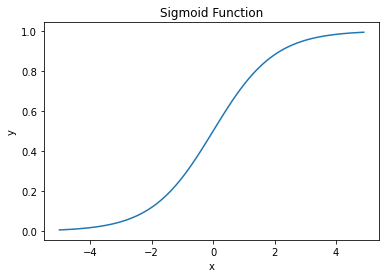

In [26]:
def sigmoid(x):
    out = 1 / (1+np.exp(-x))
    return out

x = np.arange(-5, 5, 0.1)
h = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, h)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

시그모이드 함수는 임의의 실수를 입력받아 0에서 1 사이의 실수를 출력한다.

시그모이드 함수에 의한 비선형 변환이 가능해졌는데, 계속해서 이 활성화 함수의 출력인 a(이를 **활성화**라고 한다)를 **또 다른 완전연결계층에 통과시켜 변환** 한다. 지금 예에서는 은닉층의 뉴런은 4개, 출력층의 뉴런은 3개이므로 완전연결계층에 사용되는 가중치 행렬은 **4 x 3 형상으로 설정** 해야 한다. 이것을 출력층의 뉴런을 얻을 수 있다.

지금까지를 종합해 파이썬으로 작성해보자.

In [28]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

여기서 x의 형상은 $(10,2)$이다. **2차원 데이터 10개가 미니배치로 처리된다는 뜻** 이다. 그리고 최종 출력인 s의 형상은 $(10,3)$이 된다. 이것은 10개의 데이터가 한꺼번에 처리되었고, **각 데이터는 3차원 데이터로 변환** 되었다는 뜻이다.

이 신경망은 3차원 데이터를 출력한다. 따라서 각 차원의 값을 이용하여 3 클래스 분류를 할 수 있다. 이 경우, 출력된 3차원 벡터의 각 차원은 각 클래스에 대응한느 점수가 된다(첫 번째 뉴런이 첫 번째 클래스, 두 번째 뉴런이 두 번째 클래스, ... ). 실제로 분류를 한다면 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 되는 것이다.

<font color = blue> NOTE. 점수란 확률이 되기 전의 값이다. 점수가 높을수록 **그 뉴런에 해당하는 클래스의 확률도 높아진다**. 점수를 **소프트맥스 함수**에 입력하면 확률을 얻을 수 있다. </font>

### 계층으로 클래스화 및 순전파 구현

신경망에서 하는 처리를 계층으로 구현해보자.

여기에서는 완전연결계층에 의한 변환을 Affine 계츠으로, 시그모이드 함수에 의한 변환을 Sigmoid 계층으로 구현할 것이다. 완전연결계층에 의한 변환은 기하학에서의 아핀(affine) 변환에 해당하기 때문에 Affine 계층이라고 이름 지었다.

각 계층은 파이썬 클래스로 구현하며, 기본 변환을 수행하는 메서드의 이름은 forward()로 하겠다.

신경망에는 다양한 계층이 등장하는데, 우리는 이 계층들을 모두 파이썬 클래스로 구현할 것이다.

이렇게 모듈화를 해두면 **레고 블록을 조합하듯 신경망을 구축** 할 수 있다. 이 책에서는 이러한 계층을 구현할 때 다음의 '구현 규칙'을 따르겠다.

    - 모든 계층은 forward()와 backward() 메서드를 가진다.
    - 모든 계층은 인스턴스 변수인 params와 grads을 가진다.
    
이 구현 규칙을 간단히 설명해보자.

    forward()와 backward() 메서드는 각각 순전파와 역전파를 수행한다.
    params는 가중치와 편향 같은 매개변수를 담는 리스트이다.
    grads는 params에 저장된 각 매개변수에 대응하여, 해당 매개변수의 기울기를 보관하는 리스트이다.
    
이번 절에서는 순전파만 구현한다.

In [30]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

위와 같이 시그모이드 함수를 클래스로 구현했다.

Sigmoid 계층에는 **학습하는 매개변수가 따로 없으므로 params는 빈 리스트로 초기화한다**. 그럼 계속해서 완전연결계층인 Affine 계층의 구현을 보자.

In [31]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

Affine 계층은 초기화될 때 가중치와 편향을 받습니다.

즉, 가중치와 편향은 Affine 계층의 매개변수이며(이 두 매개변수는 **신경망이 학습될 때 수시로 갱신** 된다), 리스트인 **params 인스턴스 변수에 보관** 한다. 다음으로 forward()은 순전파 처리를 구현한다.

그러면 앞에서 구현한 계층을 사용해 신경망의 추론 처리르 구현해보자. [그림 1-11]처럼 구성된 신경망을 구현할 것이다.

<font color = blue> [39페이지 그림 1-11 참고] </font>

[그림 1-11]에서 보듯, 이번 예에서는 입력 $\boldsymbol x$가 Affine 계층, Sigmoid 계층, Affine 계층을 차례로 거쳐 점수인 $\boldsymbol s$을 출력하게 된다.
    
이 신경망을 TwoLayerNet이라는 클래스로 추상화하고, 주 추론 처리는 predict(x) 메서드로 구현하겠다.

그렇다면 TwoLayerNet의 구현을 살펴보자.

In [32]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        
        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
            return x

    __init__은 먼저 가중치를 초기화하고 3개의 계층을 생성한다. 이와 함께 마지막으로는 학습해야 할 가중치 매개변수들을 params 리스트에 저장한다.
    
    모든 계층은 자신의 학습 매개변수들을 인스턴스 변수인 params에 보관하고 있으므로, 이 변수들을 더해주기만 하면 된다.
    
    이로써 TwoLayerNet의 params 변수에는 모든 학습 매개변수가 담기게 되었다.
    
이처럼 매개변수들을 **하나의 리스트에 보관함녀 매개변수 갱신과 매개변수 저장을 손쉽게 처리할 수 있다. **

참고로 파이썬에서 + 연산자는 **리스트를 결합** 해준다.

In [33]:
a = ['A', 'B']
a += ['C', 'D'] # a에 'C', 'D' 요소를 추가해준다.
print(a)

['A', 'B', 'C', 'D']


    앞서의 TwoLayerNet 구현에서는 각 계층의 params 리스트를 더해주는 것만으로도, 모든 학습 매개변수를 한아ㅡ ㅣ리스트에 담은 것이다.
    
그러면 이 클래스를 이용해 신경망의 추론을 진행해보자.    

In [34]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

이상으로 입력 데이터 $x$에 대한 점수($s$)을 구할 수 있었다.

이처럼 계층을 클래스로 만들어두면 신경망을 쉽게 구현할 수 있다.

또한 **학습해야 할 모든 매개변수가 model.params라는 하나의 리스트에 모여 있으므로**, 이어서 설명할 신경망 학습이 한결 수월해진다.

## 신경망의 학습

학습되지 않은 신경망은 좋은 추론을 할 수 없다. 그래서 학습을 먼저 수행하고, 그 **학습된 매개변수를 이용해 추론을 수행하는 흐름이 일반적** 이다.

추론이란 **다중 클래스 분류 등의 문제에 답을 구하는 작업** 이다.

한편, 신경망의 학습은 최적의 매개변수 값을 찾는 작업이다. 이번 절에서는 신경망의 학습에 대해 살펴보겠다.

### 손실 함수

신경망 학습에는 학습이 얼마나 잘 되고 있는지를 알기 위한 척도가 필요하다.

일반적으로 학습 단계의 특정 시점에서 신경망의 **성능을 나타내는 척도로 손실을 사용** 한다. 손실은 **학습 데이터와 신경망이 예측한 결과를 비교하여 예측이 얼마나 나쁜가를 산출**한 단일 값이다.

신경망의 손실은 **손실 핢수**를 사용해 구한다. 다중 클래스 분류 신경망에서는 손실 함수로 흔히 **교차 엔트로피 오차**를 이용한다. 교차 엔트로피 오차는 신경망이 출력하는 각 클래스의 확률과 정답 레이블을 이용해 구할 수 있다.

우리가 지금까지 다뤄 온 신경망에서 손실을 구해보자. 우선 앞 절의 신경망에 Softmax 계층과 Cross Entropy Error 계층을 새로 추가한다(Softmax 계층은 소프트맥스 함수를, Cross Entropy Error 계층은 교차 엔트로피 오차를 구하는 계층이다). 이 신경망의 구성을 계층 관점에서 구하면 다음과 같다.

<font color = blue> [42페이지 그림 1-12 참고] </font>

위 그림의 $\boldsymbol x$는 입력 데이터, $\boldsymbol t$는 정답 레이블, $\boldsymbol L$은 손실을 나타낸다.

이 때 Softmax 계층의 출력은 확률이 되어, 다음 계층인 Cross Entropy Error 계층에는 **확률과 정답 레이블이 입력** 된다.

이어서 Softmax 함수와 교차 엔트로피 오차에 대해 알아보자. 우선 소프트맥스 함수를 식으로 쓰면 다음과 같다.

$$y_k = \frac{exp(s_k)}{\sum_{i=1}^{n} exp(s_i)}$$

위 식은 출력이 총 $n$개 일때, $k$번째의 출력 $y_k$을 구하는 계산식이다. $y_k$은 $k$번째 클래스에 해당하는 소프트맥스 함수의 출력이다.

이 식에서 보듯 소프트맥스 함수의 분자는 **점수 $s_k$의 지수 함수**이고, 분모는 **모든 입력 신호의 지수 함수의 총합** 이다.

소프트맥스 함수의 출ㄹ겨의 각 원소는 0.0 이상 1.0 이하의 실수이다. 그리고 그 원소들을 모두 더하면 1.0이 된다.

이것이 소프트맥스의 출력을 **'확률'로 해석할 수 있는 이유** 이다.

소프트맥스의 출력인 이 확률이 다음 차례인 **교차 엔트로피 오차에 입력**된다. 이때 교차 엔트로피 오차의 수식은 다음과 같다.

$$L = -\sum_{k} t_klogy_k$$

여기서 $t_k$은 $k$번째 클래스에 해당하는 정답 레이블이다. 정답 레이블은 원핫 벡터로 표기한다.

나아가 미니배치 처리를 고려하면 교차 엔트로피 오차의 식은 다음처럼 된다. 이 식에서 데이터는 $N$개이며, $t_{nk}$은 **n번째 데이터의 k차원째의 값을 의미**한다. 그리고 $y_{nk}$는 신경망의 출력이고, $t_{nk}$는 정답 레이블이다.

$$L = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} log y_{nk} $$

이는 데이터 1개의 식을 $N$개의 미니배치로 확대한 것이다. 다만, 위 식에서는 $N$으로 나누어서, **1개당의 '평균 손실 함수'** 를 구한다. 이렇게 평균을 구함으로써 **미니배치의 크기에 관계없이 항상 일관된 척도를 얻을 수** 있다.

이 책에서는 소프트맥스 함수와 교차 엔트로피 오차를 계산하는 계층을 Softmax with Loss 계층 하나로 구현한다(이 두 계층을 통합하면 역전파 계산이 쉬워진다). 따라서 우리의 학습 시 신경망 계층 구성은 다음 그림과 같이 된다.

<font color = blue> [44페이지 그림 1-13 참고] </font>

이 책에서는 Softmax with Loss 계층을 이용하나, 그 구현에 대해서는 <밑바닥부터 시작하는 딥러닝 1>의 "4.2 손실 함수" 절을 참고하자.

### 미분과 기울기

신경망 학습의 목표는 **손실을 최소화하는 매개변수를 찾는 것** 이다. 이 때 중요한 것이 '미분'과 '기울기'이다. 이번 절에서는 미분과 기울기에 대해 간략히 설명하겠다.

어떤 함수 $y = f(x)$가 있다고 하자. 이 때 $x$에 관한 $y$의 미분은 $\frac{dy}{dx}$라고 쓴다. 이 $\frac{dy}{dx}$가 의미하는 것은 $x$의 값을 조금 변화시켰을 때(그 조금의 변화를 극한까지 줄일 때$ $y$값이 얼마나 변하는가 하는 '변화의 정도' 이다.

다변수에서도 미분을 할 수 있다. 예를 들어 $L$은 스칼라, $x$는 벡터인 함수 $L = f(x)$가 있다고 하자. 이 때 ($x$의 $i$번째 원소인) $x_i$에 대한 $L$의 미분은 $\frac{\partial L}{\partial x_i}$ 으로 쓸 수 있다. 이를 일반화하면 다음과 같이 적을 수 있다.

$$\frac{\partial L}{\partial \boldsymbol x} = \Bigl(\frac {\partial L}{\partial x_1}, \frac {\partial L}{\partial x_2}, \frac {\partial L}{\partial x_3}, \cdots, \frac{\partial L}{\partial x_n}\Bigr)$$

이처럼 **벡터의 각 원소에 대한 미분을 정리한 것**이 **기울기** 이다.

벡터와 바찬가지로, 행렬에서도 기울기를 생각할 수 있다. 예컨대 $\boldsymbol W$가 m x n 행렬이라면 $L = g(\boldsymbol W)$ 함수의 기울기 역시 **행렬의 각 원소에 대한 $L$의 미분값으로 정의**할 수 있다.

여기서 중요한 것은 $\boldsymbol W$와 $\frac{\partial L}{\partial \boldsymbol W}$의 형상이 같다는 것이다.

**'행렬과 그 기울기의 형상이 같다'** 라는 성질을 이용하면 매개변수 갱신과 연쇄 법칙을 쉽게 구현할 수 있다.

### 연쇄 법칙

학습 시 신경망은 학습 데이터를 주면 손실을 출력한다. 여기서 우리가 얻고 싶은 것은 **각 매개변수에 대한 손실의 기울기** 이다. 그 기울기를 얻을 수 있다면, 그것을 사용해 매개변수를 갱신할 수 있기 때문이다.

그렇다면 신경망의 기울기는 어떻게 구할까? 여기서 **오차역전파법**이 등장한다.

오차역전파법을 이해하는 열쇠는 **연쇄 법칙** 이다. 연쇄법칙이란 **합성함수에 대한 미분의 법칙**이다. 식으로 쓰면 다음과 같다.

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}$$

즉, $x$에 대한 $z$의 미분은 $y = f(x)$의 미분과 $z = g(y)$의 미분을 곱하면 구해질 수 있다는 것이다.

이 연쇄 법칙이 중요한 이유는 우리가 다루는 함수가 아무리 복잡하다 하더라도, 즉 아무리 많은 함수를 연결하더라도, **그 미분은 개별 함수의 미분들을 이용해 구할 수 있기 때문** 이다. 달리 말하면, 각 함수의 **국소적인 미분을 계산할 수 있다면 그 값들을 곱해서 전체의 미분을 구할 수 있다.**

### 계산 그래프

계산 그래프는 계산 과정을 시각적으로 보여준다.

아주 간단한 계산 그래프를 예를 들어 한 번 살펴보자.

#### 덧셈 노드

In [2]:
!pip install IPython

In [7]:
from IPython.display import Image

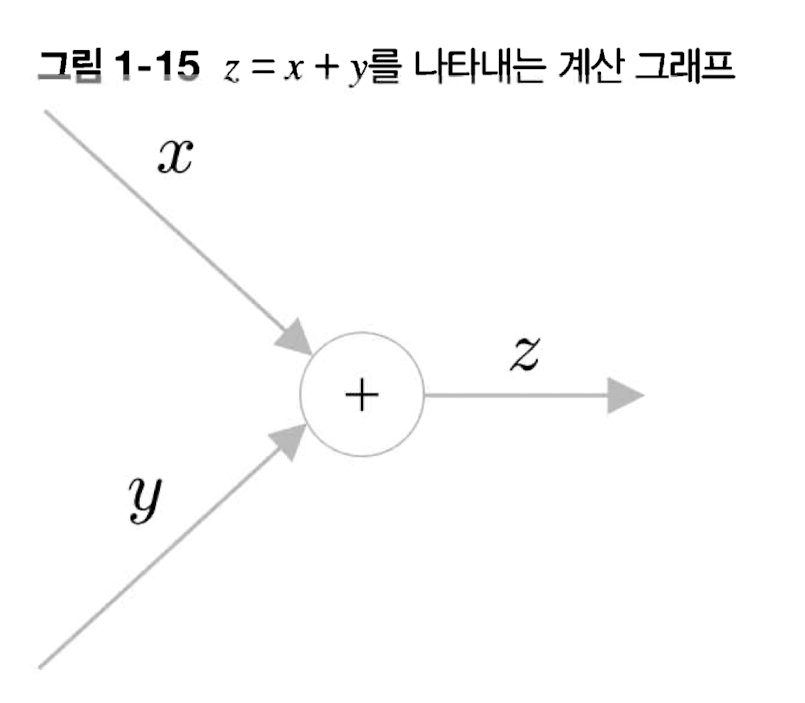

In [12]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_1.png")

[그림 1-15]에서 보듯, 계산 그래프는 노드와 화살표로 그린다.

더하기를 "+" 노드로 나타냈고, 해당하는 변수를 해당 화살표 위에 썼다. 이처럼 계산 그래프에서는 연산을 노드로 나타내고, 그 처리 결과가 순서대로 흐른다. 이것이 계산 그래프의 순전파이다.

계산 그래프를 사용하면 **계산을 시각적으로 파악**할 수 있다. 게다가 그 기울기도 직관적으로 구할 수 있다.

여기서 중요한 점은 **기울기가 순전파의 반대 방향으로 전파된다는 사실**인데, 이 반대 방향의 전파가 '역전파'이다.

역전파를 설명하기에 앞서, 역전파가 이뤄지는 전체 그림을 더 명확하게 그려보자. 우리는 $z = x+y$라는 계산을 다루고 있지만, 이 계산 앞 뒤로도 어떤 계산이 있다고 가정하자. 그리고 최종적으로 스칼라 값인 $L$이 출력된다고 가정하자.

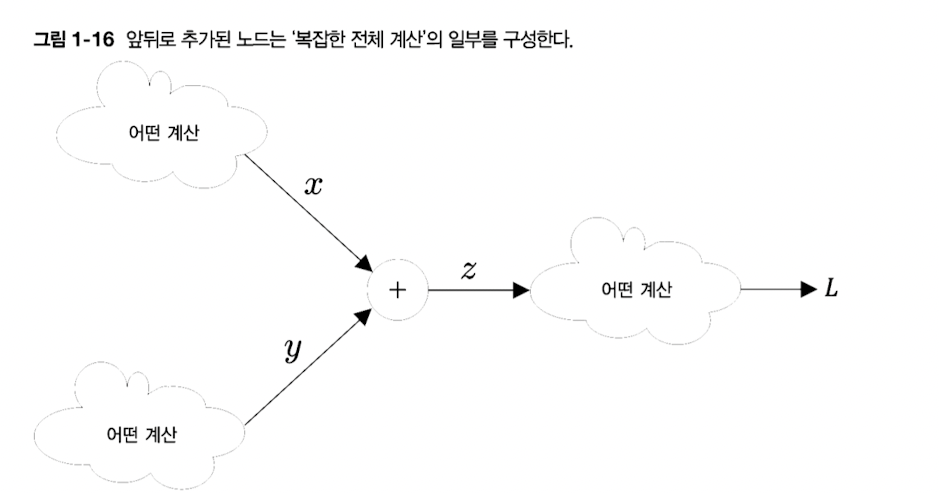

In [14]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_13.png")

목표는 $L$의 미분(기울기)를 각 변수에 대해 구하는 것이다. 그러면 계산 그래프의 역전파는 다음과 같이 그릴 수 있다.

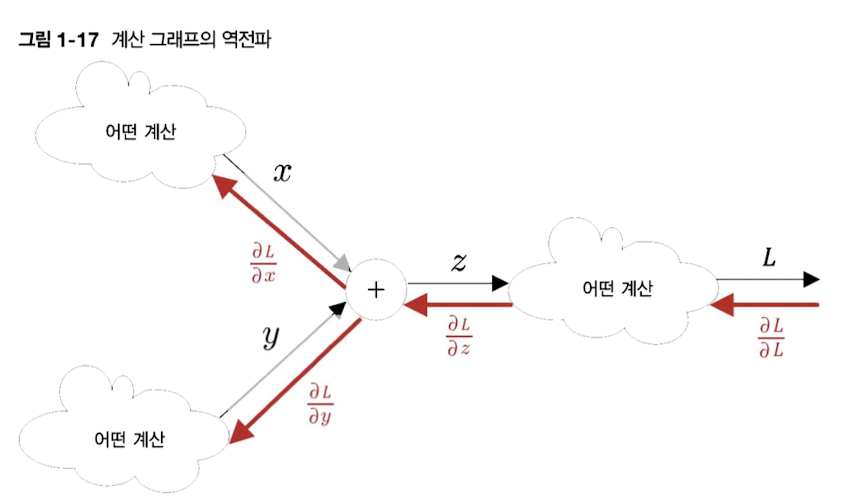

In [16]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_16.png")

위 그림처럼 역전파는 두꺼운(붉은) 화살표로 그리고, 화살표 아래에 전파되는 값을 쓰도록 하겠다.

이 때 전파되는 값은 최종 출력 $L$의 각 변수에 대한 미분이다. 이 예에서는 $z$에 대한 미분은 $\frac{\partial L}{\partial z}$이고, $x$와 $y$에 대한 미분은 각각 $\frac{\partial L}{\partial x}, \frac{\partial L}{\partial y}$이다.

여기서 연쇄 법칙이 다시 등장한다. 연쇄 법칙에 따르면 역전파로 흐르는 미분 값은 **상류로부터 흘러온 미분과 각 연산 노드의 국소적인 미분을 곱해 계산**할 수 있다.

그러므로 이 예에서는 $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial x}$이고, $\frac{\partial L}{\partial y} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial y}$이다. 

그런데 지금은 $z = x+y$의 덧셈 노드에서 이뤄지는 계산을 다루고 있다. 따라서$\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1$ 이라는 결과를 해석적으로 구할 수 있다. 이 결과를 적용하면 덧셈 노드는 상류로부터 받은 값에 **1을 곱하여** 하류로 기울기를 전파한다. 즉, **상률로부터의 기울기를 그대로 흘리기만 한다**.

이처럼 계산 그래프는 계산을 시각적으로 보여준다. 그리고 역전파에 의한 기울기 흐름을 살펴봄으로써, 그 도출 과정을 이해하는 데에도 도움을 준다.

#### 곱셈 노드

곱셈 노드는 $z = x * y$의 계산을 수행한다. 이 떄 $\frac{\partial z}{\partial x} = y, \frac{\partial z}{\partial y} = x$라는 미분 결과를 각각 구할 수 있다.

따라서 곱셈 노드의 역전파는 상류로부터 받은 기울기에 **순전파 시의 입력을 서로 바꾼 값**을 곱한다.

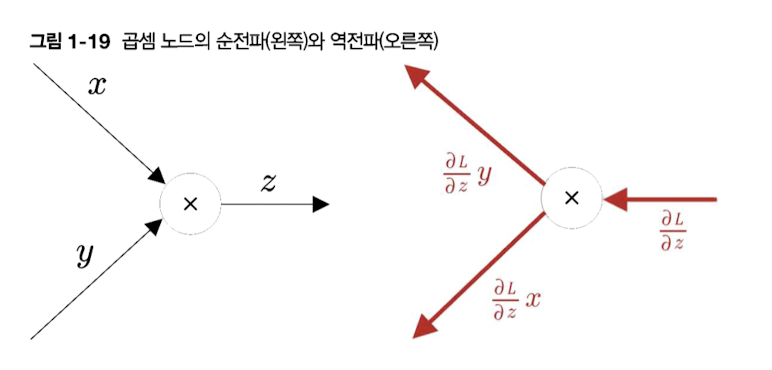

In [18]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_19.png")

지금까지 살펴본 덧셈 노드와 곱셈 노드 설명에서는 값이 하나짜리 데이터만 예로 들었지만, 벡터, 행렬, 혹은 텐서 같은 다변수를 흘려도 문제 없다.

다시 말해, 이 경우는 다른 원소들과는 독립적으로 원소별 연산을 수행한다.

#### 분기 노드

분기 노드는 다음과 같이 분기하는 노드이다.

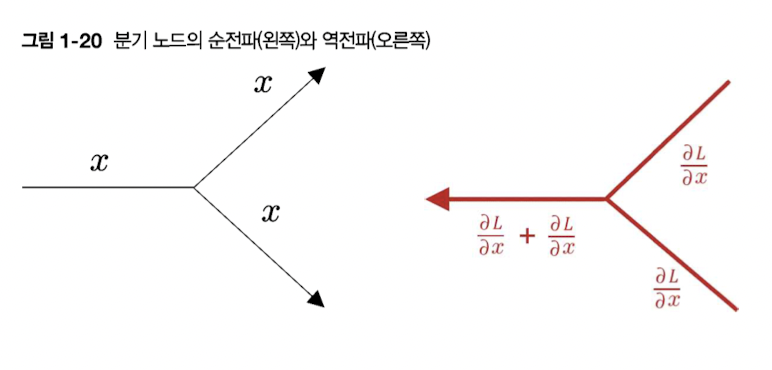

In [20]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_20.png")

분기 노드는 따로 그리지 않고 단순히 선이 두 개로 나뉘도록 그리는데, 이 때 같은 값이 복제되어 분기한다.

따라서 분기 노드를 복제 노드라고도 할 수 있다. 그리고 그 역전파는 **상류에서 온 기울기의 합**이 된다.

#### Repeat 노드

2개로 분기하는 노드를 일반화하면 $N$개로의 분기가 된다. 이를 Repeat 노드라고 한다. Repeat 노드의 예를 계산 그래프로 확인해보자.

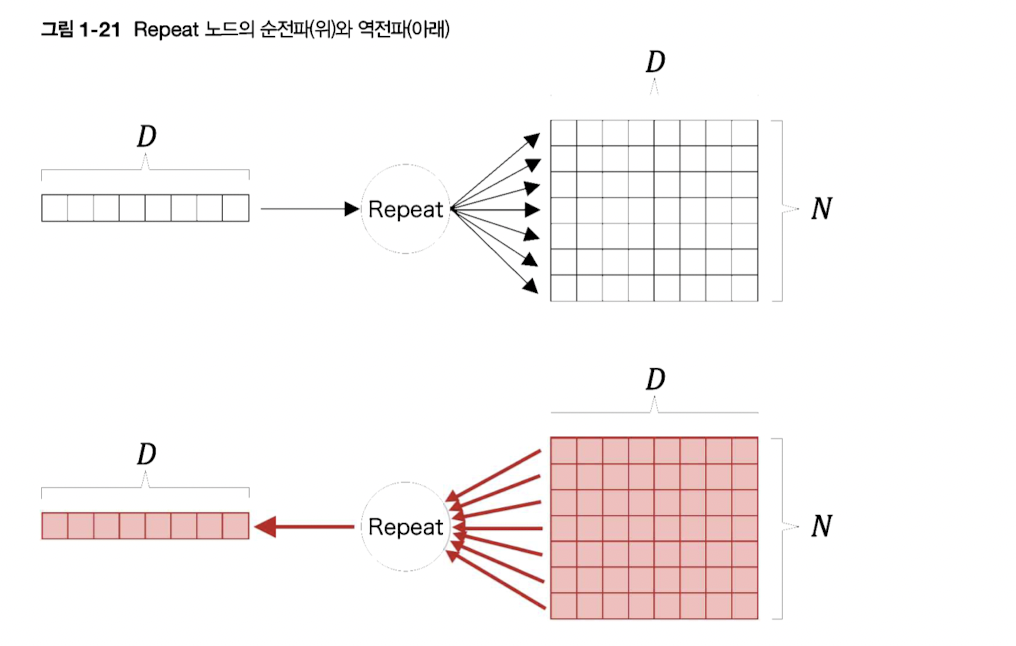

In [22]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_21.png")

위 그림은 길이가 $D$인 행렬을 $N$개로 복제하는 얘이다. 이 Repeat 노드는 $N$개의 분기 노드로 볼 수 있으므로, 그 역전파는 **N개의 기울기를 모두 더해 구할 수 있다$. 코드로는 다음과 같이 구현한다.

In [29]:
import numpy as np
D, N = 8, 7 # 행렬의 길이 8, 7개의 노드로 복제
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파
## x를 N번만큼 반복한다. axis = 1은 행렬의 각 원소를 N번 반복하고, axis = 0은 각 행을 한꺼번에 N번 반복한다.

dy = np.random.randn(N,D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True) # 역전파
## np.sum의 axis = 0이면 열끼리 합산결과를 산출한다.

    여기서는 np.repeat() 메서드가 원소 복제를 수행한다. 이 코드에서는 배열 x를 N번 복제하는데, 이 떄 axis를 지정하여 어느 축 방향으로 복제할지를 조정할 수 있다.
    
    역전파에서는 총합을 구해야하므로 np.sum() 메서드를 이용한다. 이때도 axis 인수를 설정하여 어느 축 방향으로 합을 구할지 정한다.
    
    또한 인수로 keepdims = True를 설정하여 2차원 배열의 차원 수를 유지한다. 이 예에서는 keepdims가 True면 np.sum()의 결과 형상은 (1,D)가 되며, False라면 (D)가 된다.

#### Sum 노드

Sum 노드는 범용 덧셈 노드이다. 예컨대 $N * D$ 배열에 대해 그 총합을 0축(= 열 방향의 합)에 대해 구하는 계산을 생각해보자. 이 때 Sum 노드의 순전파와 역전파는 [그림 1-22]처럼 된다.

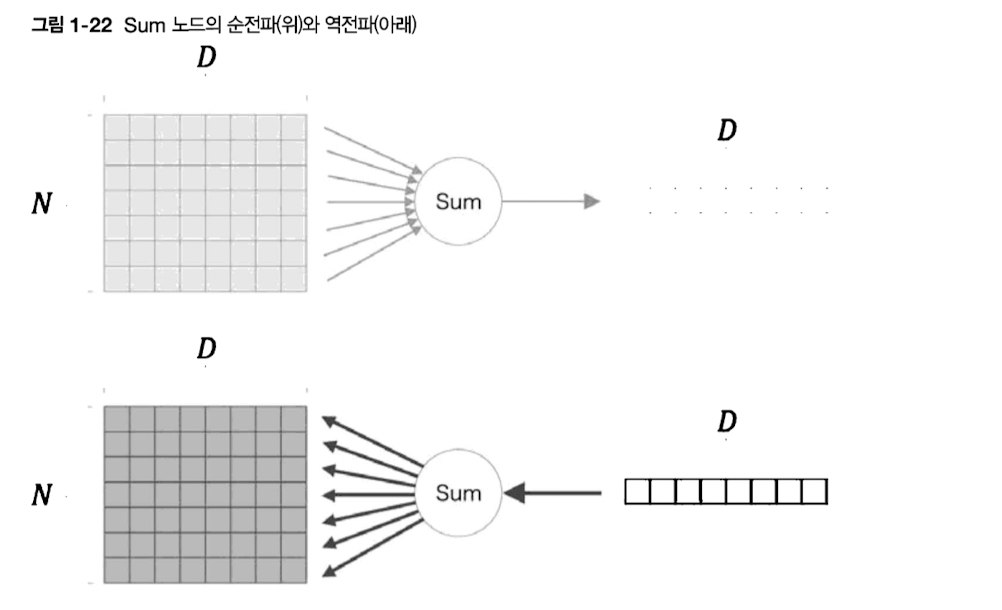

In [31]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_22.png")

위의 그림에서 보듯, Sum 노드의 역전파는 상류로부터의 기울기를 모든 화살표에 분배한다. 덧셈 노드의 역전파를 자연스럽게 확장한 것이다.

그렇다면 이를 구현해보자.

In [32]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis = 0, keepdims = True) # 순전파

dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis = 0) # 역전파

    Sum 노드의 순전파는 np.sum() 메서드로, 역전파는 np.repeat() 메서드로 구현했다.
    
    Sum 노드와 Repeat 노드는 서로 반대 관계이다. 즉, Sum 노드의 순전파가 Repeat 노드의 역전파가 되며, Sum 노드의 역전파가 Repeat 노드의 순전파가 된다는 것이다.

#### MatMul 노드

행렬의 곱셈을 MatMul 노드로 표현한다.

$\boldsymbol {y = xW}$라는 계산을 예로 들어 MatMul 노드를 설명하겠다. 여기서 $\boldsymbol{x, W, y}$의 형상은 각각 1 x D, D x H, 1 x H이다.

이때, $\boldsymbol x$의 $i$번째 원소에 대한 미분은 다음과 같이 구한다.

$$\frac{\partial L}{\partial x_i} = \sum_{j} \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x_i}$$

이 식의 $\frac{\partial L}{\partial x_i}$는 $x_i$를 조금 변화시켰을 때 $L$이 얼마나 변할 것인가라는 '변화의 정도'를 나타낸다.

여기서 $x_i$를 변화시키면 벡터 $\boldsymbol y$의 모든 원소가 변하고, 그로 인해 최종적으로 $L$이 변하게 된다.

따라서 $x_i$에서 $L$에 이르는 연쇄 법칙의 경로는 여러 개가 있으며, 그 총합은 $\frac{\partial L}{\partial x_i}$가 된다.

$\frac{\partial y_j}{\partial x_i} = w_{ij}$가 성립하므로, 이를 식에 대입하면 다음과 같다.

$$\frac{\partial L}{\partial x_i} = \sum_{j} \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} W_{ij}$$

위 식에서 결국 $\frac{\partial L}{\partial x_i}$는 **벡터 $\frac{\partial L}{\partial y}$와 $\boldsymbol W$의 $i$행 벡터의 내적** 으로 구해짐을 알 수 있다. 그렇다면 이 관계로부터 다음의 식을 유도할 수 있다.

$$\frac{\partial L}{\partial \boldsymbol x} = \frac{\partial L}{\partial \boldsymbol y}\boldsymbol W^{T}$$

<font color = purple>
개인적으로 이해한 식 유도 방법
    
1. $x_i$에 대한 미분값을 구할 때, $x_i$가 변동하면 모든 $y$의 원소가 변한다.
    
2. 이 변동값은 $y$의 $j$번째 원소들을 모두 합해주어야 계산된다.
    
3. 곱셈 노드에서 한 것과 같이, $\frac {\partial y_j}{\partial x_i} = W_{ij}$가 성립하므로, 이를 $W$으로 표현할 수 있다.
    
4. 결국 이것은 벡터 $\frac {\partial L}{\partial x_i}$은 $W$의 $i$행 벡터의 내적으로 구해지는데, $i$행 벡터를 연산하기 위해서는 행렬의 곱셈에 따라 Transpose가 필요하다.
    
중요한 아이디어는 **$\boldsymbol x_i$가 변동함에 따라 모든 $\boldsymbol y$의 원소가 변동한다는 것** 이다.
    
</font>

앞에서 $\boldsymbol x$는 1 x D, $\boldsymbol y$는 1 x H, $\boldsymbol W$은 D x H의 형상을 가졌다고 했다.

그렇다면 앞에서 도출한 역전파의 형상을 확인해보자.

우선, $\frac{\partial L}{\partial \boldsymbol x}$는 앞에서 확인한 것과 같이 1 x D의 형상이다.

$\frac{\partial L}{\partial \boldsymbol y}$ 역시도 $\boldsymbol y$와 형상이 같으므로 1 x H의 형상이다.

따라서 1 x H의 형상에 무엇인가를 행렬 곱연산을 해 1 x D의 행렬로 만드려면 H x D가 필요하다. 따라서 $\boldsymbol {W^{T}}$의 형상인 H x D의 형상이 적절하다.

이를 역으로 취해, 역전파의 수식을 유도할 수 있다. 이 방법도 $\boldsymbol{y = xW}$라는 행렬 곱 계산을 예로 설명하되, 미니배치 처리를 고려해 $\boldsymbol x$에는 $N$개의 데이터가 담겨 있다고 가정하자. 그렇다면 $\boldsymbol{x, W, y}$의 형상은, 각각 N x D, D x H, N x H가 되어, 역전파의 계산 그래프는 다음과 같이 된다.

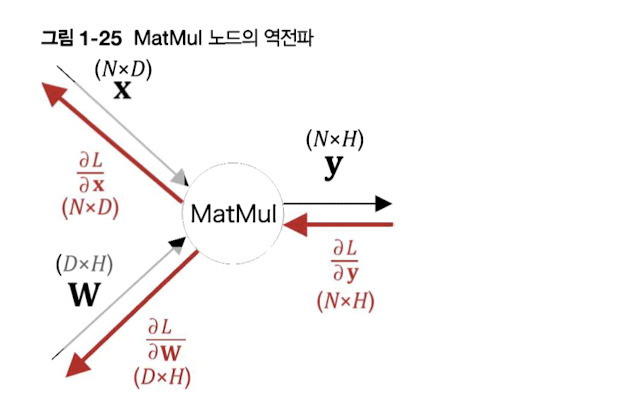

In [34]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_24.png")

그렇다면 $\frac{\partial L}{\partial \boldsymbol x}$는 어떻게 계산하는지 생각해보자. 이 때 이 최종 값과 관련된 변수는 상류에서의 기울기 $\frac{\partial L}{\partial y}$와 $\boldsymbol W$이다.

여기에서 $\boldsymbol W$가 관여하는 이유는 간단하다. 행렬의 역전파에서도 **'순전파 시의 입력을 서로 바꾼 행렬을 사용**하는 것'이 열쇠이기 때문이다. 그 다음은 각 행렬의 형상에 주목하여 정합성이 유지되도록 행렬 곱을 조합한다. 따라서 다음과 같은 결론이 나온다.

$$\frac{\partial L}{\partial \boldsymbol x}_{N * D} = \frac{\partial L}{\partial \boldsymbol y}_{N * H} \boldsymbol W^{T}_{H * D}$$

$\boldsymbol W$에 대한 미분값도 자연스럽게 서로의 행렬을 바꾸어서 도출된다.

이 노드를 하나의 계층으로 구현해보자.

In [35]:
class MatMul:
    def __init__(self, W):
        self.params = [W] 
        ## 매개변수 W을 params에 보관 
        self.grads = [np.zeros_like(W)]
        self.x = None # 초기화 되어야 하는 값
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

    MatMul 계층은 학습하는 매개변수를 parmas에 보관한다. 거기에 대응시키는 형태로, 기울기는 grads에 보관한다.
    
    역전파에서는 dx와 dW을 구해 가중치의 기울기를 인스턴스 변수인 grads에 저장한다.
    
    기울기 값을 설정하는 grads[0][...] = dW 코드에서 점 3개로 이루어진 생략 기호를 사용했다.
    이렇게 하면 넘파이 배열이 가리키는 메모리 위치를 고정시킨 다음, 그 위치에 원소를 덮어쓴다.
    
생략 기호를 예를 들어서 설명해보자.

In [37]:
a = np.array([1,2,3])
b = np.array([4,5,6])

    이 상태에서 a = b와 a[...] = b 모두 a에는 [4,5,6]이 할당된다.
    
    그러나 두 경우에 a가 가리키는 메모리의 위치는 서로 다른데, 메모리를 단순화해 시각화하면 [그림 1-27]처럼 된다.

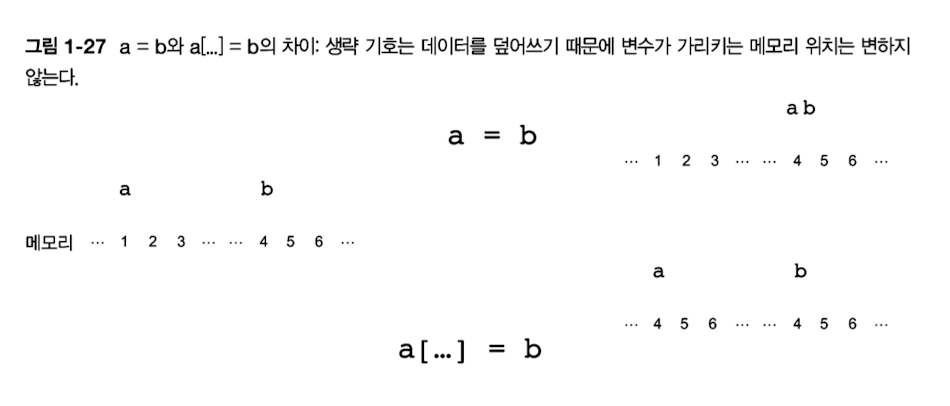

In [40]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_27.png")

    위 그림처럼 a = b에서는 a가 가리키는 메모리 위치가 b가 가리키는 위치와 같아진다.
    즉, 실제 데이터 (4,5,6)은 복제되지 않는다는 뜻으로, 이를 얕은 복사라고 한다.
    
    한편, a[...] = b일 때에는 a의 메모리 위치는 변하지 않고, 대신 a가 가리키는 메모리에 b의 원소가 복제된다.
    실제 데이터가 복제된다는 뜻에서 이 방식을 '깊은 복사'라고 한다.
    
이상에서 생략 기호를 이용하여 변수의 메모리 주소를 고정했다. 우리는 이처럼 메모리 주소를 고정함으로써 인스턴스 변수 grads를 다루기가 더 쉬워진다.

<font color = blue> NOTE. grads 리스트에는 각 매개변수의 기울기를 저장한다. 이때 grads 리스트의 각 원소는 넘파이 배열이며, 계층을 생성할 때 한 번만 생성한다. 그 후로는 항상 '생략 기호'를 이용하므로, 이 넘파이 배열의 메모리 주소가 변하는 일 없이 항상 갚을 덮어쓴다. 이렇게 하면 **기울기를 그룹화하는 작업을 최초에 한 번만 하면 된다**는 이점이 생긴다. </font>

이상이 MatMul 계층의 구현이며, 그 구현 코드는 commons/layers.py에 있으니 참고하자.

### 기울기 도출과 역전파 구현

실용적인 계층들을 구현해보자. Sigmoid, Affine, Softmax with Loss 등 신경망의 구현에 필요한 신경망을 구현한다.

#### Sigmoid 계층

시그모이드 함수를 수식으로 쓰면 $y = \frac{1}{1+exp(-x)}$이다. 그리고 그 미분은 다음과 같다.

$$\frac{\partial y}{\partial x} = y(1-y)$$

그렇다면 Sigmoid 계층을 파이썬으로 구현해보자.

In [41]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

    순전파 때는 출력을 인스턴스 변수 out에 저장하고, 역전파를 계산할 때 이 out 변수를 사용한다.
    
    따라서 __init__의 초기화에서 self.out을 None으로 설정한 후에, forward에서 self.out = out으로 설정하고 backward에서 인스턴스를 호출하는 식으로 코드를 작성한다.

#### Affine 계층

앞에서와 같이 Affine 계층의 순전파는 y = np.matmul(x, W) + b로 구현할 수 있으며, 여기서 편향을 더할 때는 넘파이의 브로드캐스트가 사용된다.

그 점을 명시적으로 나타내면 Affine 계층의 계산 그래프는 다음과 같이 그릴 수 있다.

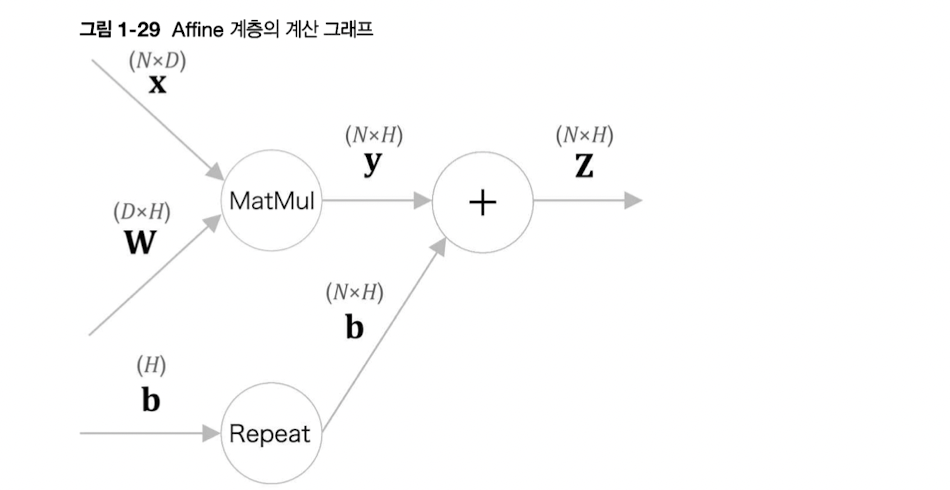

In [43]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_29.png")

MatMul 노드로 행렬 곱을 계산한 후, 편향은 Repeat 노드에 의해 복제된 후 더해진다.

Repeat 노드가 수행하는 복제가 넘파이의 브로드캐스트 기능에 해당된다. 다음은 Affine 계층의 파이썬 코드를 보자.

In [44]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

    인스턴스 변수 params에는 매개변수를, grads에는 기울기를 저장했다.
    
    Affine의 역전파는 Matmul 노드와 Repeat 노드의 역전파를 수행하면 구할 수 있다.
    
    Repeat 노드의 역전파는 np.sum() 메서드로 계산할 수 있는데, 이 때 행렬의 형상을 잘 살펴보고 어떤 axis로 합을 구할지 명시해야 한다.
    
    가중치 매개변수의 기울기를 인스턴스 변수 grads에 저장한다. 이상이 Affine 계층의 구현이다.

#### Softmax with Loss 계층

소프트맥스 함수와 교차 엔트로피 오차는 Softmax with Loss라는 하나의 계층으로 구현할 것이다.

[그림 1-30]은 이 계층의 계산 그래프이다.

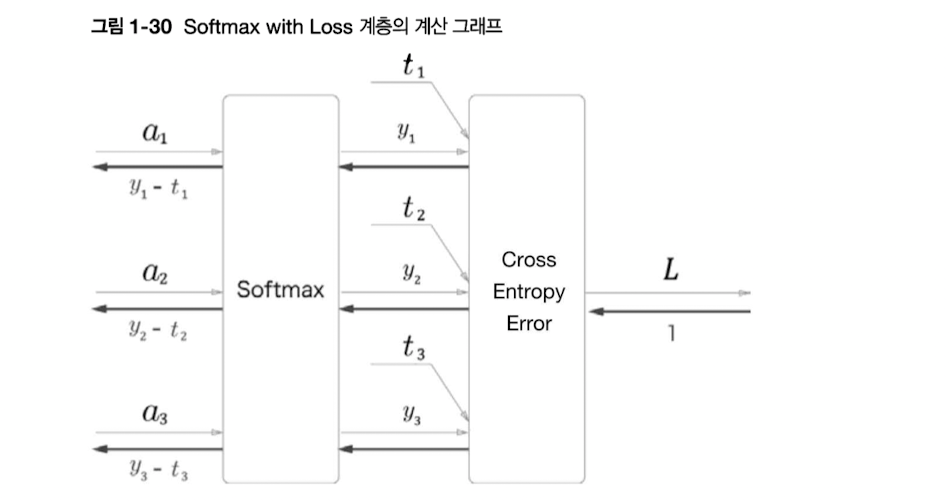

In [45]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_30.png")

여기에서는 소프트맥스 함수는 Softmax 계층으로, 교차 엔트로피 오차는 Cross Entropy Error 계층으로 표기했다.

그리고 3-클래스 분류를 가정하여 이전 계층(입력층에 가까운 계층)으로부터 3개의 입력을 받도록 했다.

Softmax 계층은 입력 $(a_1, a_2, a_3)$을 정규화하여 $(y_1, y_2, y_3)$을 출력한다. 

그리고 Cross Entropy Error 계층은 Softmax의 출력 $(y_1, y_2, y_3)$와 정답 레이블 $(t_1, t_2, t_3)$을 받고, 이 데이터로부터 손실 $L$을 구해 출력한다.

<font color = blue> NOTE. 위 그림에서 주목할 부분은 역전파의 결과이다. Softmax 계층의 역전파는 $(y_1 - t_1, y_2 - t_2, y_3 - t_3)$으로 깔끔하게 떨어진다. $(y_1, y_2, y_3)$는 Softmax 계층의 출력이고, $(t_1, t_2, t_3)$은 정답 레이블이므로, Softmax 계층의 역전파는 자신의 출력과 정답 레이블의 차라는 것이다. </font>

### 가중치 갱신

오차역전파법으로 기울기를 구했으면, 그 기울기를 이용해 신경망의 매개변수를 갱신한다.

이때 신경망의 학습은 다음 순서로 진행된다.

- 1단계 미니배치 : 훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.

- 2단계 기울기 계산 : 오차역전파법으로 **각 가중치 매개변수에 대한 손실 함수의 기울기**를 구한다.

- 3단계 매개변수 갱신 : 기울기를 사용하여 매개변수를 갱신한다.

- 4단계 반복 : 1~3단계를 필요한 만큼 반복한다.

이러한 단계를 거쳐 신경망 학습이 이루어진다.

우선 미니배치에서 데이터를 선택하고, 이어서 오차역전파법으로 가중치의 기울기를 얻는다.

이 기울기는 현재의 가중치 매개변수에서 **손실을 가장 크게 하는 방향**을 가리킨다. 따라서 매개변수를 그 기울기와 반대 방향으로 갱신하면 손실을 줄일 수 있다. 이것이 바로 **경사하강법**이다. 그런 다음 이상의 작업을 필요한 만큼 반복한다.

3단계에서 수행하는 가중치 갱신 기법의 종류는 다양하다. 여기에서는 그중 가장 단순한 **확률적경사하강법(SGD)** 를 구현할 것이다. '확률적'이라는 것은 무작위로 선택된 데이터(미니배치)에 대한 기울기를 이용한다는 뜻이다.

SGD는 단순한 방법이다. SGD는 가중치를 기울기 방향으로 일정한 거리만큼 갱신한다. 수식으로는 다음과 같다.

$$\boldsymbol W \leftarrow \boldsymbol W - \eta \frac {\partial L}{\partial \boldsymbol W}$$

이 식에서 갱신하는 가중치 매개변수가 $\boldsymbol W$고, $\boldsymbol W$에 대한 손실 함수의 기울기가 $\frac {\partial L}{\partial \boldsymbol W}$이다. &eta;은 학습률(learning rate)을 나타내며, 실제로는 0.01이나 0.001 같은 값을 미리 정해 사용한다.

그렇다면 SGD를 파이썬으로 구현해보자. 여기에서는 모듈화를 고려하여 매개변수를 갱신할 클래스를 common/optimizer.py에 구현해놓겠다. 여기에는 SGD이외에 AdaGrad와 Adam 등의 구현도 들어 있다.

    매개변수를 갱신하는 클래스에는 update(params, grads)라는 공통 메서드를 갖도록 구현한다.
    
    이 메서드의 인수 params에는 신경망의 가중치가, grads에는 기울기가 각각 리스트로 저장되어 있어야 한다.
    
    param와 grads 리스트에는 대응하는 매개변수와 기울기가 같은 위치(인덱스)에 저장되어 있다고 가정하자.
    
그렇다면 SGD는 다음과 같이 구현할 수 있다.

In [46]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

    초기화 인수 lr은 학습률의 의미하며, 그 값을 인스턴스 변수로 저장한다.
    
    그리고 update(params, grads) 메서드는 매개변수 갱신을 처리한다.
    
    이 SGD 클래스를 사용하면 신경망의 매개변수 갱신을 다음처럼 할 수 있다.
    
    --------------------------------------------------------------------------------------------------------------
    
    model = TwoLayerNet(...)
    optimizer = SGD()
    
    for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...
    
    --------------------------------------------------------------------------------------------------------------

최적화 기법에는 SGD 외에도 Momentum, AdaGrad, Adam 등의 기법이 있다. 이 최적화 기법들 각각에 대한 설명은 <밑바닥부터 시작하는 딥러닝>의 '6.1 매개변수 갱신' 절을 참고하자.

## 신경망으로 문제를 풀다

### 스파이럴 데이터셋

In [47]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python/밑바닥부터 시작하는 딥러닝 2'

In [56]:
os.chdir("/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch01")
sys.path.append(os.pardir)
from dataset import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()
x.shape

(300, 2)

In [52]:
t.shape

(300, 3)

위와 같이 **입력은 2차원 데이터**이고, 분류할 클래스 수는 3개로, **3차원 데이터** 이다. $t$는 원핫 벡터로, 정답에 해당하는 클래스에는 1이, 그 외에는 0이 레이블되어 있다.

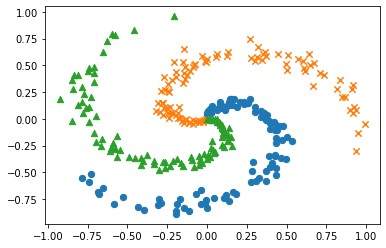

In [53]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

위 그림처럼 입력은 2차원 데이터이고 <font color = purple> 두 축으로 입력이 주어지므로 </font>

분류할 클래스는 3개가 있다 <font color = purple> 세 개의 도형이 있다 </font>

따라서 비선형 분리를 학습해야 한다. 비선형인 시그모이드 함수를 활성화 함수로 사용하는 은닉층이 있는 신경망으로 이 비선형 패턴을 학습해보자.

실전에서는 데이터셋을 훈련용과 테스트용(그리고 검증용) 데이터로 분리하여 학습과 평가를 수행하지만, 여기에서는 실험을 간단히 하기 위해 이 작업을 생략한다.

<font color = purple> Validation data는 하이퍼파라미터 최적화를 위해 쓰인다. </font>

In [54]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
        # predict 함수
        def predict(self, x):
            for layer in self.layers:
                x = layer.forward(x)
            return x
        
        # 손실 함수 계산
        def forward(self, x, t):
            score = self.predict(x)
            loss = self.loss_layer.forward(score, t)
            return loss
        
        # 역전파
        def backward(self, dout = 1):
            dout = self.loss_layer.backward(dout)
            for layer in reversed(self.layers):
                dout = layer.backward(dout)
            return dout

신경망에서 사용하는 처리 블록들을 계층 단위로 미리 구현해놨으므로, 여기에서는 이 계층들의 순전파와 역전파를 적절한 순서로 호출만 하면 된다.

### 학습용 코드

이어서 학습을 수행하는 코드를 보겠다. 여기서 학습 데이터를 읽여 들어 신경망(모델)과 옵티마이저(최적화기)를 생성한다.

그리고 앞 절에서 본 학습의 네 단계의 절차대로 학습을 수행한다. 머신러닝 분야에서는 **문제를 풀기 위해서 설계한 기법(신경망이 SVM 등)을 가리켜 보통 '모델'**  이라고 한다. 학습용 코드는 다음과 같다.

In [71]:
sys.path.append(os.pardir)
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300 
batch_size = 30
hidden_size = 10
learning_rate = 0.1

# 데이터 읽기, 모델과 옵티마이저 설정 
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size # '//'은 몫이다. %(나머지)와 대응된다.
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters+1)*batch_size]
        batch_t = t[iters * batch_size : (iters+1)*batch_size]
    
    # 기울기를 통해 매기변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
    
        total_loss += loss
        loss_count += 1
    
    # 정기적으로 학습 경과 출력
        if(iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d \ %d | 손실 %.2f' % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0

| 에폭 1 | 반복 10 \ 10 | 손실 1.10
| 에폭 2 | 반복 10 \ 10 | 손실 1.10
| 에폭 3 | 반복 10 \ 10 | 손실 1.10
| 에폭 4 | 반복 10 \ 10 | 손실 1.10
| 에폭 5 | 반복 10 \ 10 | 손실 1.10
| 에폭 6 | 반복 10 \ 10 | 손실 1.10
| 에폭 7 | 반복 10 \ 10 | 손실 1.10
| 에폭 8 | 반복 10 \ 10 | 손실 1.10
| 에폭 9 | 반복 10 \ 10 | 손실 1.10
| 에폭 10 | 반복 10 \ 10 | 손실 1.10
| 에폭 11 | 반복 10 \ 10 | 손실 1.10
| 에폭 12 | 반복 10 \ 10 | 손실 1.10
| 에폭 13 | 반복 10 \ 10 | 손실 1.10
| 에폭 14 | 반복 10 \ 10 | 손실 1.10
| 에폭 15 | 반복 10 \ 10 | 손실 1.10
| 에폭 16 | 반복 10 \ 10 | 손실 1.10
| 에폭 17 | 반복 10 \ 10 | 손실 1.10
| 에폭 18 | 반복 10 \ 10 | 손실 1.10
| 에폭 19 | 반복 10 \ 10 | 손실 1.10
| 에폭 20 | 반복 10 \ 10 | 손실 1.10
| 에폭 21 | 반복 10 \ 10 | 손실 1.10
| 에폭 22 | 반복 10 \ 10 | 손실 1.10
| 에폭 23 | 반복 10 \ 10 | 손실 1.10
| 에폭 24 | 반복 10 \ 10 | 손실 1.10
| 에폭 25 | 반복 10 \ 10 | 손실 1.10
| 에폭 26 | 반복 10 \ 10 | 손실 1.10
| 에폭 27 | 반복 10 \ 10 | 손실 1.10
| 에폭 28 | 반복 10 \ 10 | 손실 1.10
| 에폭 29 | 반복 10 \ 10 | 손실 1.10
| 에폭 30 | 반복 10 \ 10 | 손실 1.10
| 에폭 31 | 반복 10 \ 10 | 손실 1.11
| 에폭 32 | 반복 10 \ 10 | 손실 1.10
| 에폭 33 | 반복 10 \

**1. 우선 하이퍼러미터를 설정한다.**

구체적으로는 **학습하는 에폭 수, 미니배치 크기, 은닉층의 뉴런 수, 학습률**을 설정한다.

**2. 계속해서 데이터를 읽어 들이고, 신경망(모델)과 옵티마이저를 생성한다.**

2층 신경망을 이미 TwoLayerNet 클래스로, 또 옵티마이저를 SGD 클래스로 구현해놨으니 여기에서는 이 클래스를 이용한다.

<font color = blue> NOTE. 에폭은 학습 단위이다. 1에폭은 **학습 데이터를 모두 살펴본 시점(데이터셋을 1바퀴 돌아본 시점)을 뜻한다. 여기에서는 300에폭을 학습한다. </font>

학습은 미니배치 방식으로 진행되며, 데이터를 무작위로 선택한다.

**3. 에폭 단위로 데이터를 뒤섞고, 뒤섞은 데이터 중 앞에서부터 순서대로 뽑아낸다.**

데이터 뒤섞기에는 np.random.permutation() 메서드를 사용한다.

이 메서드에 인수로 $N$을 주면, 0부터 N-1까지의 무작위 순서를 생성해 반환한다. 실제 사용 예는 다음과 같다.

In [66]:
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

In [67]:
np.random.permutation(10)

array([3, 4, 2, 7, 8, 5, 6, 0, 9, 1])

<font color = purple> 인덱스를 호출하는 데 유용하다 </font>

**4. 계속해서 기울기를 구해 매개변수를 갱신한다.**

**5. 마지막으로, 정기적으로 학습 결과를 출력한다.**

여기에서는 10번째 반복마다 손실의 평균을 구해 loss_list 변수에 추가했다.

이제 이 코드를 실행해보자.

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


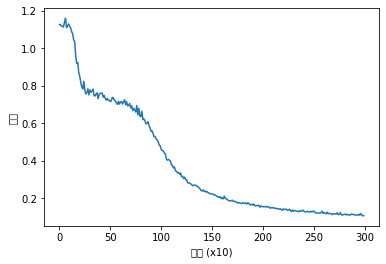

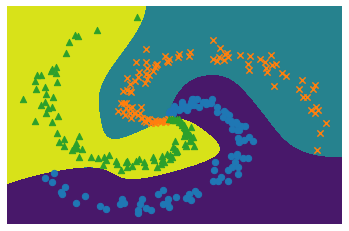

In [68]:
import train_custom_loop

위에서 보듯, 학습을 진행함에 따라 손실이 줄어들고 있다. 신경망이 올바른 방향으로 학습되고 있는 것이다.

또한, 그림에서 보듯 학습된 신경망은 나선형 패턴을 올바르게 파악하고 있음을 알 수 있다. 즉, 비선형 분리 영역을 학습할 수 있었다.

이처럼 신경망에 은닉층을 추가하면 더 복잡한 표현이 가능해진다. 층을 더 깊게 쌓으면 표현력 또한 더 풍부해진다.

### Trainer 클래스

이 책에서는 학습을 수행하는 역할을 Trainer라는 클래스로 제공한다. 내용은 앞 절의 소스 코드와 거의 같다.

Trainer 클래스는 common/trainer.py에 있다. 이 클래스와 초기화 메서드는 신경망(모델)과 옵티마이저를 인수로 받는다. 그리고 fit() 메서드를 호출해 학습을 시작한다.

이 fit() 메서드가 받는 인수는 다음과 같다.

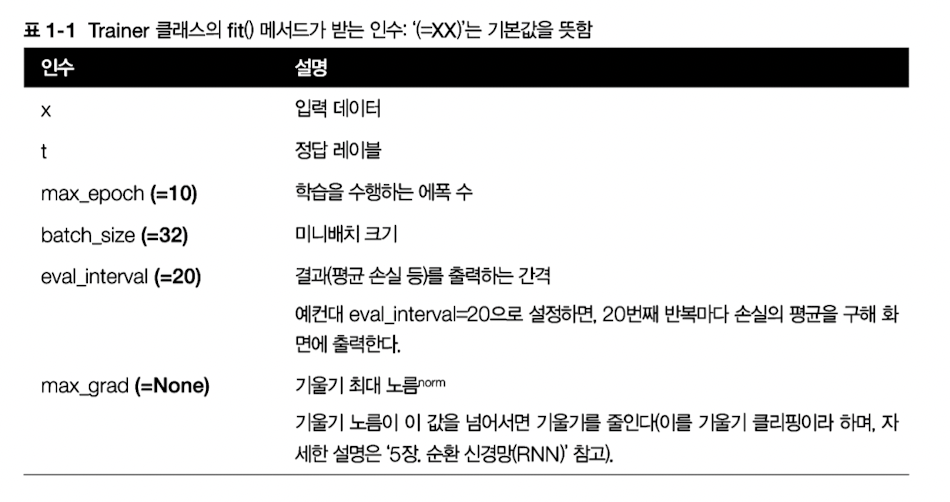

In [69]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch1_table1.png")

    Trainer 클래스는 plot() 메서드도 제공한다. 이 메서드는 fit()에서 기록한 손실(정확하게는 eval_interval 시점에 평가된 평균 손실)을 그래프로 그려준다.
    
    eval_interval은 평균 손실을 출력하는데, 배치 한 번을 수행한 것을 interval = 1로 친다.
    
이제 Trainer 클래스를 사용해 학습을 수행하는 코드를 보자.

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


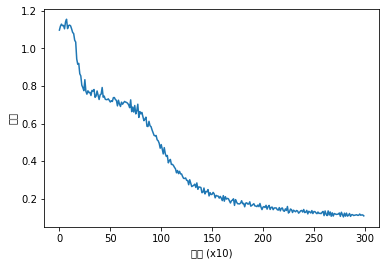

In [70]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

이전 절과 같은 신경망 학습이 이루어진다.

이 책에서는 앞으로 학습을 해야할 때면 항상 Trainer 클래스를 사용할 것이다.

## 계산 고속화

신경망의 학습과 추론에 드는 연산량은 상당하다.

그래서 신경망에서는 얼마나 빠르게 계산하느냐가 상당히 중요한 주제이다. 그래서 이번 절에서는 신경망 고속화에 도움되는 '비트 정밀도'와 'GPU'에 관해 가볍게 설명해보겠다.

### 비트 정밀도

넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용한다.

In [72]:
a = np.random.randn(3)
a.dtype

dtype('float64')

이처럼 **넘파이 배열의 인스턴스 변수 dtype을 출력해 데이터 타입을 알아 볼 수 있다**. 바로 앞 결과가 출력한 float64는 64비트 부동소수점 수라는 뜻이다.

넘파이는 64비트 부동소수점 수를 표준으로 사용한다. 그러나 신경망의 추론과 학습은 32비트 부동소수점 수로도 문제없이 수행할 수 있다.

32비트는 64비트의 절반이므로, 메모리 관점에서는 항상 32비트가 더 좋다고 말할 수 있다.

또, 신경망 계산 시 데이터를 전송하는 '버스 대역폭'이 병목이 되는 경우가 왕왕 있다. 이런 경우에도 데이터 타입이 작은 게 더 유리하다.

마지막으로 계산 속도 측면에서도 32비트 부동소수점 수가 일반적으로 더 빠르다.

이런 이유로 이 책에서는 32비트 부동소수점 수를 우선으로 사용한다. 넘파이에서 32비트 부동소수점 수를 사용하려면 다음과 같이 데이터 타입을 np.float32나 'f'로 지정한다.

In [74]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [75]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

또한, 신경망 추론으로 한정하면 16비트 부동소수점 수를 사용해도 인식률이 거의 떨어지지 않는다. 그리고 넘파이에도 16비트 부동소수점 수가 준비되어 있다.

다만, 일반적으로 CPU와 GPU는 연산 자체를 32비트로 수행한다. 따라서 16비트 부동소수점 수로 변환하더라도 계산 자체는 32비트로 이뤄져서 처리 속도 측면에서는 혜택이 없을 수도 있다.

그러나 학습된 가중치를 파일에 저장할 때는 16비트 부동소수점 수가 여전히 유효하다. 가중치 데이터를 16비트로 저장하면 32비트를 쓸 때보다 절반의 용량만 사용하기 때문이다. 그래서 이 책에서는 학습된 가중치를 저장하는 경우에 한해 16비트 부동소수점 수로 변환하겠다.

### GPU(쿠파이)

딥러닝의 계산은 대량의 곱하기 연산으로 구성된다. 이 대량의 곱하기 연산 대부분은 병렬로 계산할 수 있는데, 바로 이 점에서는 CPU보다 GPU가 더 유리하다. 대부분의 딥러닝 프레임워크가 CPU뿐만 아니라 GPU로 지원하는 이유가 바로 이것이다.

이 책의 예제 중에서는 쿠파이라는 파이썬 라이브러리를 사용할 수 있는 것이 있다. 쿠파이는 GPU를 이용해 병렬 계산을 수행해주는 라이브러리인데, 엔비디아의 GPU에서만 동작하고 CUDA라는 GPU 전용 범용 병렬 컴퓨팅 플랫폼을 설치해야 한다. 자세한 설치 방법은 쿠파이 공식 설치 가이드를 참고하자.

쿠파이를 이용하면 엔비디아 GPU를 사용해 간단하게 병렬 계산을 수행할 수 있다. 쿠파이는 넘파이와 호환되는 API를 제공하기 때문에, 넘파이로 작성한 코드를 'GPU용'으로 변경하기 아주 쉽다. 보통은 numpy를 cupy로 대체해주기만 하면 끝이다.

이 책에서는 이해하기 쉽게 구현하는 것을 우선하므로 기본적으로 CPU에서 수행되는 코드로 작성한다. 그러나 계산이 오래 걸리는 코드는 선택적으로 쿠파이를 사용한 구현도 제공한다.

<font color = blue> 넘파이가 쿠파이로 바뀌는 구조는 매우 단순하다. common/config.py나 common/np.py.common/layers.py의 임포트문을 참고하자. </font>